### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = 'drive/MyDrive/Python for Data Analysis by Hanna Pylieva/Data/yulu_rental.csv'
df = pd.read_csv(data_path)

1.Чи є зв'язок між вологістю (humidity) та швидкістю вітру (windspeed) в залежності від сезону? Можна використати діаграму розсіювання, де вологість буде на одній осі, а швидкість вітру - на іншій, та розглянути, чи існує який-небудь зв'язок між цими двома показниками.

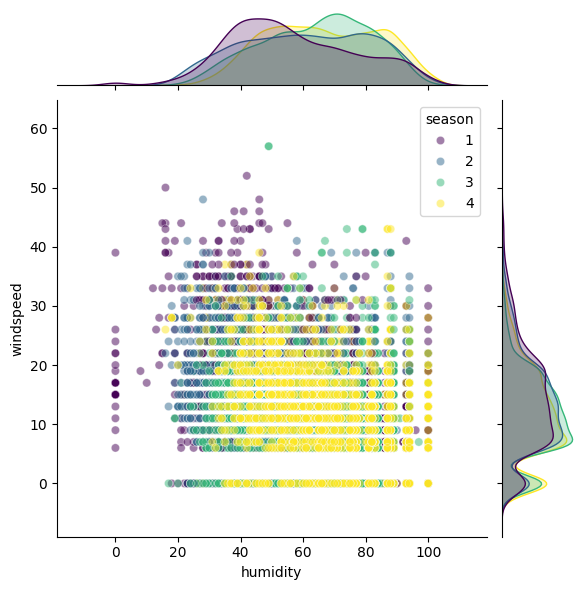

In [86]:
sns.jointplot(data=df, x='humidity', y='windspeed', hue='season', palette='viridis', alpha=.5);

2.Як різні погодні умови впливають на кількість зареєстрованих користувачів у різні сезони? Можна використати стовпчасту діаграму, де погодні умови будуть на осі X, а середня кількість зареєстрованих користувачів - на осі Y, розділена на сезони.

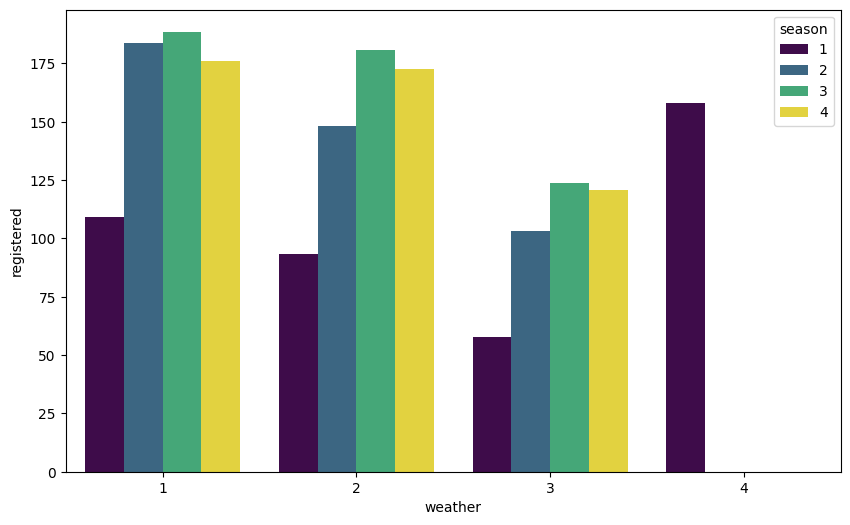

In [76]:
weather_season_group = df.groupby(['weather', 'season'])['registered'].mean().reset_index();

plt.figure(figsize=(10, 6))

sns.barplot(data=weather_season_group, x='weather', y='registered', hue='season', palette='viridis');


**weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

3.Як змінюється кількість велосипедів, взятих в оренду, у залежності від дня тижня та часу доби (розглянемо ранок, день, вечір, ніч)? Можна використати теплову карту, де дні тижня будуть на одній осі, а кількість велосипедів - на іншій, розділена на різні часи доби.

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['day of week'] = df['datetime'].dt.dayofweek

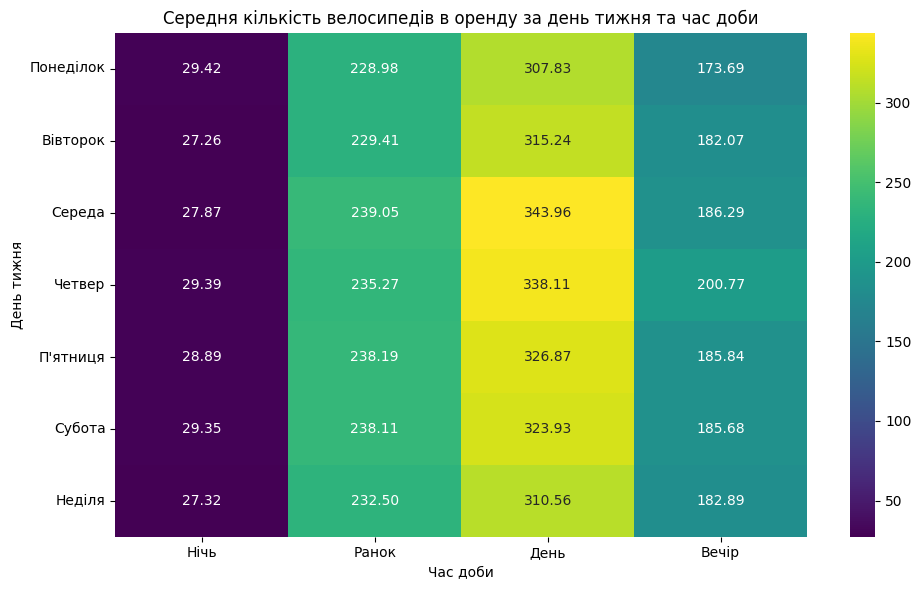

In [88]:
df['time of day'] = pd.cut(df['datetime'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Нічь', 'Ранок', 'День', 'Вечір'])
df['day of week'] = pd.cut(df['datetime'].dt.day, bins=[0, 1, 2, 3, 4, 5, 6, 7], labels=["Понеділок", "Вівторок", "Середа", "Четвер", "П'ятниця", "Субота", "Неділя"])

heatmap_data = df.groupby(['day of week', 'time of day'])['count'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, cmap='viridis', annot=True, fmt=".2f")
plt.title('Середня кількість велосипедів в оренду за день тижня та час доби')
plt.xlabel('Час доби')
plt.ylabel('День тижня')
plt.yticks(rotation=0)
plt.tight_layout()
